In [208]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Generate the features in the synthetic dataset
ids = np.arange(1, 1001)
heights = np.random.uniform(150, 200, size = 1000)
cities = np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Dallas', 'St. Louis'], size = 1000)
salaries = np.random.randint(30000, 150000, size = 1000)

# Create a DataFrame
df = pd.DataFrame({'id': ids, 'height': heights, 'city': cities, 'salary': salaries})

# Display the first few rows of the DataFrame
#print(df.head())

df.to_csv('synthetic_data.csv', index = False)
print("Synthetic data saved to sythetic_data.csv")

Synthetic data saved to sythetic_data.csv


In [217]:
# Load the dataset from the CSV file
df = pd.read_csv('synthetic_data.csv')
print("Synthetic data loaded from synthetic_data.csv")

Synthetic data loaded from synthetic_data.csv


In [210]:
# Introduce Missing Values
# Height: missing values in 8% of the rows and some extreme outliers
height_missing = np.random.choice(df.index, size =int(0.08 * len(df)), replace = False)
df.loc[height_missing, 'height'] = np.nan

#Salary: missing values in 12% of the rows
salary_missing = np.random.choice(df.index, size = int(0.12 * len(df)), replace = False)
df.loc[salary_missing, 'salary'] = np.nan

# Introduce extreme ouliers
non_missing_heights = df.index[df['height'].notna()]
outliers = np.random.choice(non_missing_heights, size = 4, replace = False)
df.loc[outliers, 'height'] = [100, 125, 225, 250]

# Display the first few rows of the DataFrame
print(df["height"].describe(),"\n")
print(df.head(10))
print("Total missing values in height", df['height'].isna().sum())
print("Total missing values in salary", df['salary'].isna().sum())


count    920.000000
mean     174.296719
std       15.205299
min      100.000000
25%      161.296958
50%      174.660518
75%      186.935868
max      250.000000
Name: height, dtype: float64 

   id      height         city    salary
0   1  168.727006       Dallas       NaN
1   2         NaN      Chicago       NaN
2   3  186.599697    St. Louis   58602.0
3   4  179.932924     New York  118789.0
4   5  157.800932    St. Louis   81399.0
5   6  157.799726     New York   53472.0
6   7  152.904181  Los Angeles   79230.0
7   8  193.308807     New York  103616.0
8   9  180.055751       Dallas   37099.0
9  10  185.403629      Chicago  148614.0
Total missing values in height 80
Total missing values in salary 120


In [211]:
# Handle Missing Values
# Height: replace missing values with the mean or median
height_median = df['height'].median()
df.loc[:, 'height'] = df['height'].fillna(height_median)

# Salary: replace missing values with forward fill or mean
salary_mean = df['salary'].mean()
df.loc[:, 'salary'] = df['salary'].fillna(salary_mean)

print(df.isna().sum(), "\n")
print(df.head(10))


id        0
height    0
city      0
salary    0
dtype: int64 

   id      height         city         salary
0   1  168.727006       Dallas   86930.529545
1   2  174.660518      Chicago   86930.529545
2   3  186.599697    St. Louis   58602.000000
3   4  179.932924     New York  118789.000000
4   5  157.800932    St. Louis   81399.000000
5   6  157.799726     New York   53472.000000
6   7  152.904181  Los Angeles   79230.000000
7   8  193.308807     New York  103616.000000
8   9  180.055751       Dallas   37099.000000
9  10  185.403629      Chicago  148614.000000


In [212]:
from sklearn.preprocessing import MinMaxScaler
# Normalize and Preprocess tha Data
scaler = MinMaxScaler()

# Normalize height and salary and assign the results
df[['height', 'salary']] = scaler.fit_transform(df[['height', 'salary']])

# Encode the city column
df = pd.get_dummies(df, columns = ['city'], prefix='city')

print(df.head(10))  

   id    height    salary  city_Chicago  city_Dallas  city_Los Angeles  \
0   1  0.458180  0.474541         False         True             False   
1   2  0.497737  0.474541          True        False             False   
2   3  0.577331  0.237766         False        False             False   
3   4  0.532886  0.740821         False        False             False   
4   5  0.385340  0.428308         False        False             False   
5   6  0.385332  0.194888         False        False             False   
6   7  0.352695  0.410179         False        False              True   
7   8  0.622059  0.614002         False        False             False   
8   9  0.533705  0.058039         False         True             False   
9  10  0.569358  0.990104          True        False             False   

   city_New York  city_St. Louis  
0          False           False  
1          False           False  
2          False            True  
3           True           False  
4         

The histogram plots for height and salary provide a good visualization of the distribution of the normalized data. 
This data provides a good visualization of the spread of the data. A good even distribution would look like a bell curve. We can see in the salary data that since the data missing is replaced with the mean, the mean outperforms the rest of the numbers by quite a bit. 

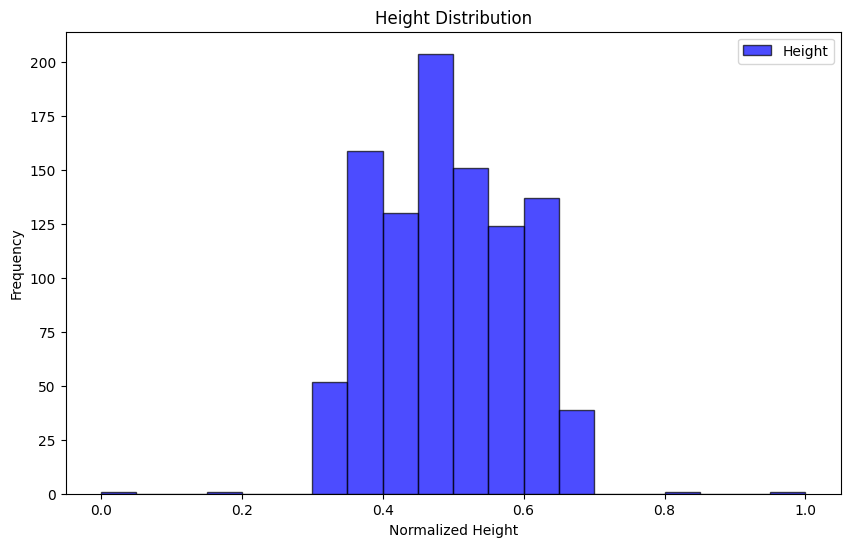

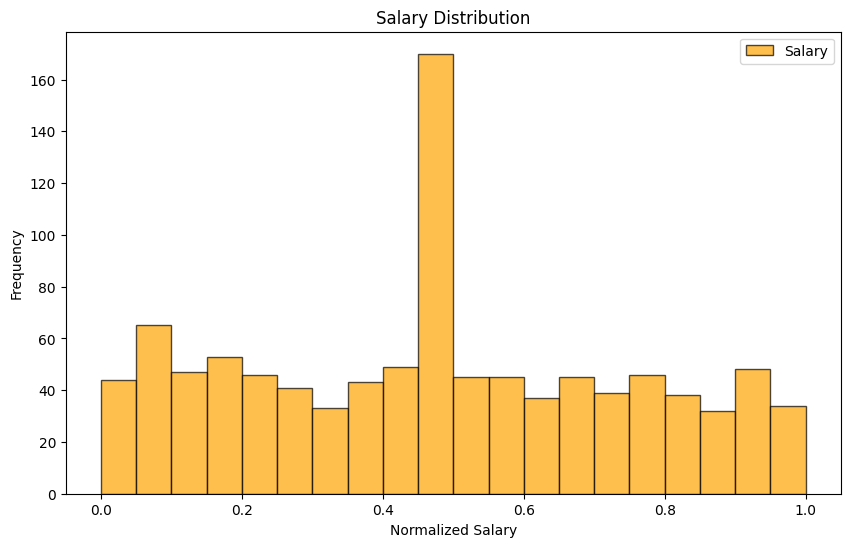

In [213]:
#Create a visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram of height and salary
plt.figure(figsize=(10, 6))
plt.hist(df['height'], bins=20, color='blue', alpha=0.7, label='Height', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Normalized Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=20, color='orange', alpha=0.7, label='Salary', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Normalized Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The scatter plot shows all of the points that are in the data set between height and salary. We are able to see the desity of the correlation between height and salary, we can see that there is not really a strong correlation. This is also the best way to see outliers, as they stand out pretty stongly compared to the grouped data in the middle. 

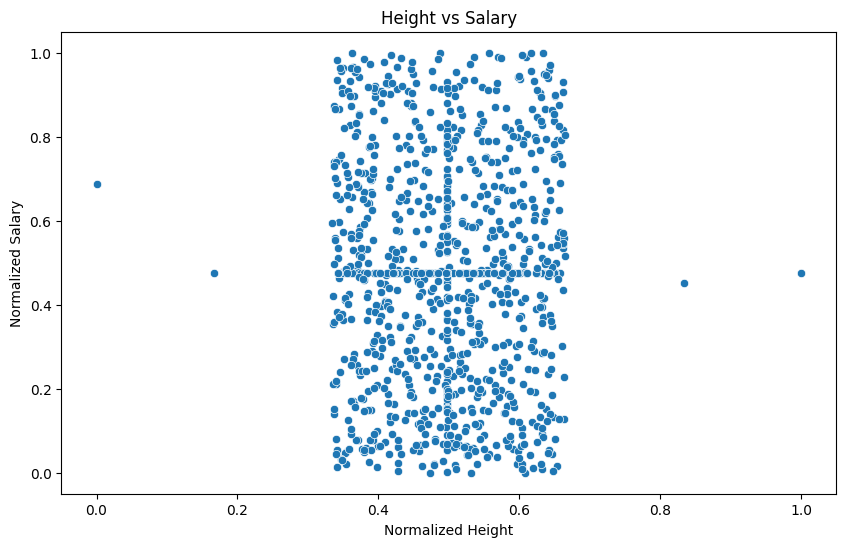

In [214]:
#Scatter plot of height and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='salary', data=df)
plt.title('Height vs Salary')
plt.xlabel('Normalized Height')
plt.ylabel('Normalized Salary')
plt.show()

The city distribution bar graph makes it very easy to compare how often a city is listed in the dataset. The data is pretty even as we can see here. With a real world dataset this could be used to show which city has the most customers or if a city is falling behind in population. The reason for the bar graph is to be able to easily compare the data to each other. 

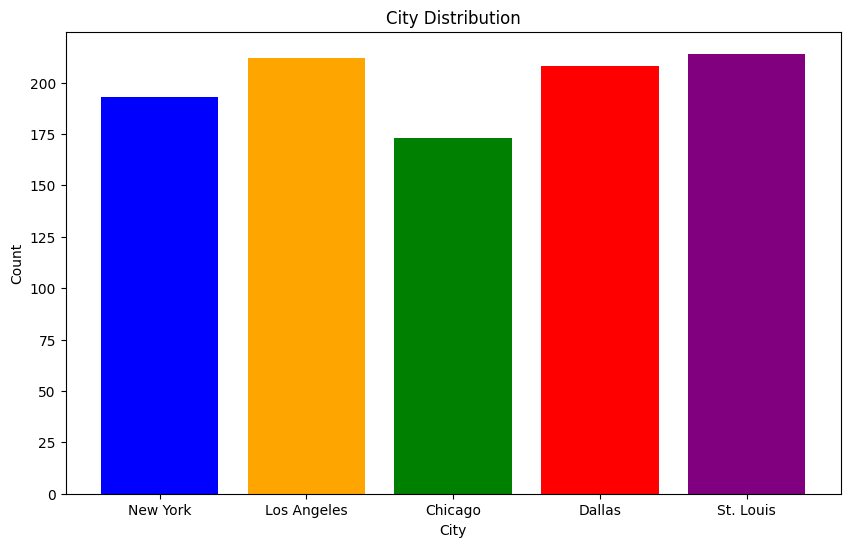

In [215]:
# Bar chart for city distribution
city_counts = {
    "New York": df['city_New York'].sum(),
    "Los Angeles": df['city_Los Angeles'].sum(),
    "Chicago": df['city_Chicago'].sum(),
    "Dallas": df['city_Dallas'].sum(),
    "St. Louis": df['city_St. Louis'].sum()
    }
  

plt.figure(figsize=(10, 6))
plt.bar(city_counts.keys(), city_counts.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('City Distribution')
plt.xlabel('City')  
plt.ylabel('Count')
plt.show()

KDE plot provides the best look at the desity/ concentration. It also gives us a good look at the "peaks" this allows us to see where the most data lies. This KDE plot is not great for outliers because they are not easy to see. 

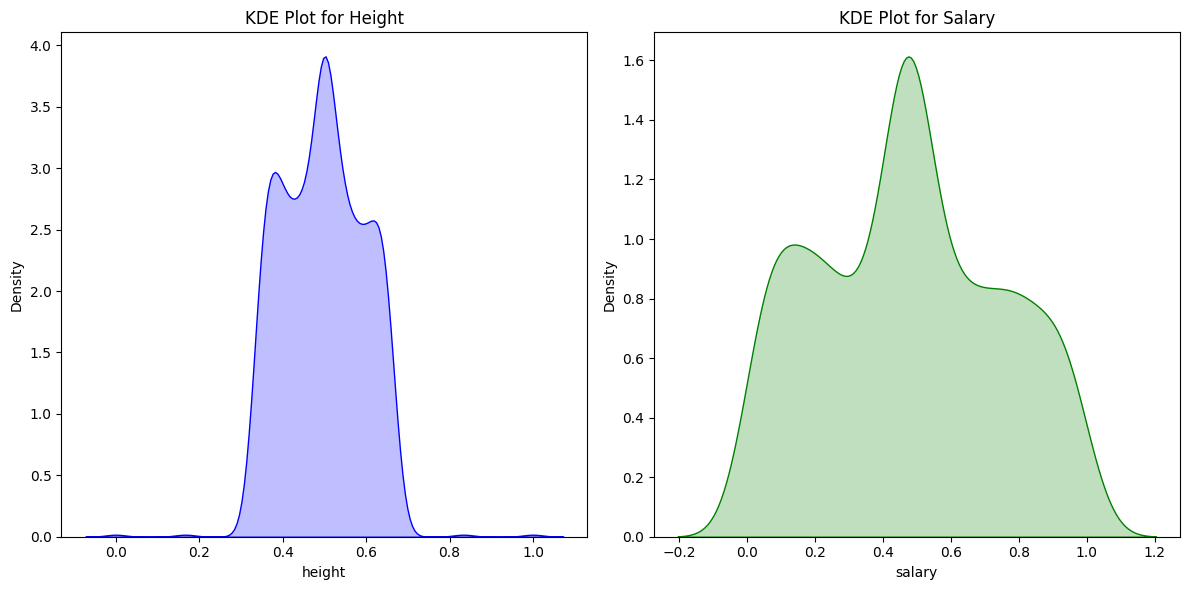

In [216]:
# KDE Plot for height and salary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df['height'], fill=True, color="blue")
plt.title("KDE Plot for Height")

plt.subplot(1, 2, 2)
sns.kdeplot(df['salary'], fill=True, color="green")
plt.title("KDE Plot for Salary")

plt.tight_layout()
plt.show()
